### ANN Churn Analysis Sample
Link: https://www.section.io/engineering-education/build-ann-with-keras/
Dataset: Predicting Churn for Bank Customers, https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers/metadata

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Basic EDA

In [6]:
dataset.shape

(10000, 14)

In [7]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


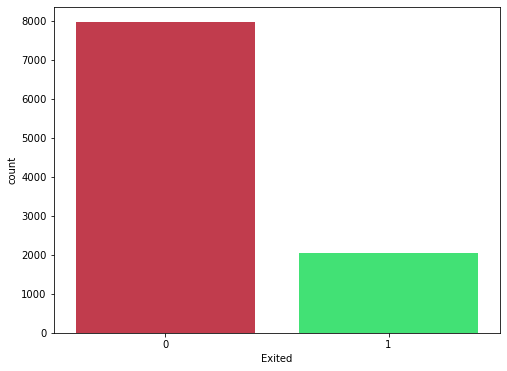

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(dataset.Exited,palette=['#D7263D','#27FB6B'])
plt.show()

In [9]:
(dataset.Exited==1).sum()

2037

In [10]:
(dataset.Exited==0).sum()

7963

In [11]:
print(f'Ratio of customers who exited: {(dataset.Exited==1).sum()/len(dataset):.3f}')

Ratio of customers who exited: 0.204


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

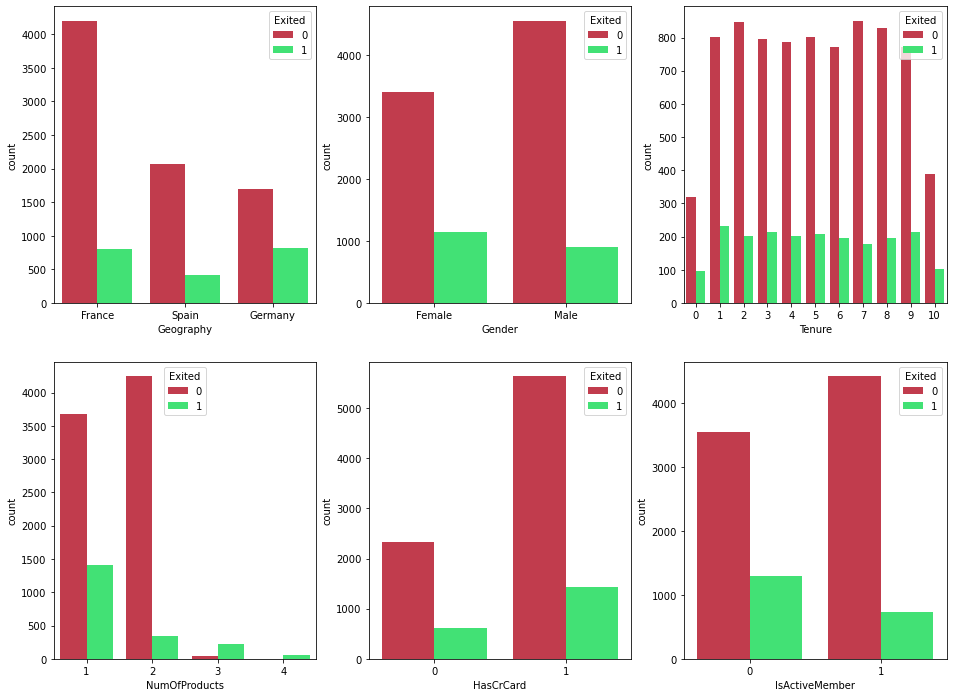

In [12]:
fig_data = ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard', 
                  'IsActiveMember']
q = 1
plt.figure(figsize=(16,12))
# Plot a grid with count plots of all categorical variables
for j in fig_data:
    plt.subplot(2,3,q)
    ax = sns.countplot(dataset[j], hue=dataset.Exited, palette=['#D7263D','#27FB6B'])
    plt.xlabel(j)
    q += 1
plt.show()

German citizens have the highest rates of attrition among the 3 countries. Although there are more males than females in the dataset, the latter were responsible for more exits.

People who purchased 2 products were less likely to exit than those who bought only one. Interestingly, the rates of churn of people with 3+ products are very high.

Non-active members were much more likely to exit than active ones.

### Prepare and Pre-process Data

In [13]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [14]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [15]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

#### Encoding

Label Encoding the gender column replaces the texts with numbers. 0 represents Female, while 1 represents Male.

In [16]:
# Encoding
# label encode the gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [17]:
X[0]

array([619, 'France', 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

<B>One-Hot Encoding</B> creates new columns in the dataset. The number of new columns created depends on the number of unique values in the column to be one-hot encoded. These new columns replace the geography column. For instance, 1.0, 0.0, 0.0 represents a customer from France.

In [18]:
# one-encode the geography column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [19]:
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [20]:
# split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [23]:
# Initializing the ANN
ann = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=X_train[0].shape))
# Add the second hidden layer
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
# Add the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [24]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Training ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 20)

Epoch 1/20
250/250 [==============================] - 3s 4ms/step - loss: 0.5282 - accuracy: 0.7666
Epoch 2/20
250/250 [==============================] - 1s 4ms/step - loss: 0.4387 - accuracy: 0.8171
Epoch 3/20
250/250 [==============================] - 1s 4ms/step - loss: 0.4165 - accuracy: 0.8273
Epoch 4/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3990 - accuracy: 0.8389
Epoch 5/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3840 - accuracy: 0.8425
Epoch 6/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3717 - accuracy: 0.8493
Epoch 7/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3627 - accuracy: 0.8530
Epoch 8/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3570 - accuracy: 0.8546
Epoch 9/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3523 - accuracy: 0.8547
Epoch 10/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3498 - accuracy: 0.8554

#### Test sample
<pre>
Country --> Spain
Credit Score --> 600
Gender --> Male
Age --> 40 years
Tenure --> 3 years
Balance remaining --> #60000
Number of Products owned --> 2
Own a Credit Card? --> Yes
Is an Active Member? --> Yes
Estimated Salary --> $50000
</pre>

In [26]:
# Evaluate the model
print(ann.predict(sc.transform([[0, 0, 1, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))

[[0.04357019]]


In [27]:
# Test with a threshold
print(ann.predict(sc.transform([[0, 0, 1, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)
# If false that means the customer will not churn.

[[False]]


In [28]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
pd.DataFrame(list(zip(y_test, y_pred)), columns=['Actual', 'Predicted'])

,Actual,Predicted
0,0,[False]
1,1,[False]
2,0,[False]
3,0,[False]
4,0,[False]
...,...,...
1995,0,[False]
1996,0,[False]
1997,0,[False]
1998,0,[False]


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1511   84]
 [ 195  210]]
0.8605


<b>Following comments can change depending on the results.</b>

The accuracy score is over 85%. Out of 2000 cases, our model predicted 1502+222 cases correctly. The confusion matrix shows the number of True Positives, False Positives, False Negatives, and True Negatives.

Our model predicted that 183 customers churn (False Positives), and 93 customers did not churn (False Negatives). But it correctly predicted that 1502 customers churn (True Positives), and 222 customers did not churn (True Negatives).